# MNIST Dataset on GPU 

_Import the necessary libraries for DNN run on GPU_

In [2]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K


Using TensorFlow backend.


_Setup DNN configuration: number of epochs, batch size, etc._

In [3]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28


_Create test and train dataset_

In [4]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


_CNN model_

In [5]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


_Model fit_

In [9]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 3s 42us/step - loss: 0.0238 - accuracy: 0.9929 - val_loss: 0.0270 - val_accuracy: 0.9917
Epoch 2/12
60000/60000 [==============================] - 3s 44us/step - loss: 0.0238 - accuracy: 0.9925 - val_loss: 0.0247 - val_accuracy: 0.9922
Epoch 3/12
60000/60000 [==============================] - 3s 42us/step - loss: 0.0217 - accuracy: 0.9933 - val_loss: 0.0281 - val_accuracy: 0.9917
Epoch 4/12
60000/60000 [==============================] - 3s 42us/step - loss: 0.0204 - accuracy: 0.9936 - val_loss: 0.0272 - val_accuracy: 0.9923
Epoch 5/12
60000/60000 [==============================] - 3s 42us/step - loss: 0.0203 - accuracy: 0.9937 - val_loss: 0.0273 - val_accuracy: 0.9921
Epoch 6/12
60000/60000 [==============================] - 3s 42us/step - loss: 0.0197 - accuracy: 0.9938 - val_loss: 0.0294 - val_accuracy: 0.9922
Epoch 7/12
60000/60000 [==============================] - 3s 42us/st

In [10]:
import matplotlib.pyplot as plt

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

_Display training DNN configuration : loss, accuracy per epoch_

<Figure size 432x288 with 0 Axes>

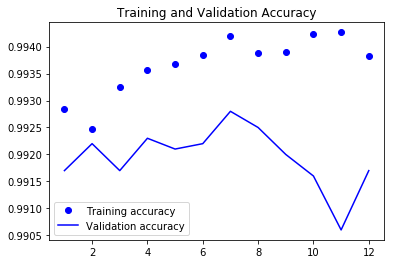

<Figure size 432x288 with 0 Axes>

In [16]:
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

<Figure size 432x288 with 0 Axes>

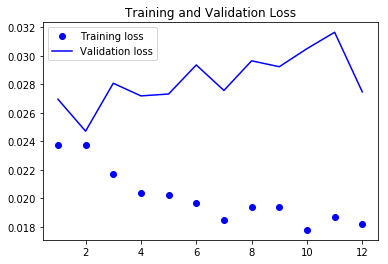

<Figure size 432x288 with 0 Axes>

In [17]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.figure()